## Project Overview
This project involves analyzing a dataset of over 10,000 Google Play Store app records to uncover trends, detect anomalies, and understand user behavior patterns. The analysis combines SQL for data querying and Python for data cleaning, visualization, and reporting.

## Objectives
Clean and preprocess raw app data.
Use SQL queries to explore app categories, ratings, installs, and pricing.
Identify anomalies such as outliers or inconsistent data.
Visualize key insights to support data-driven conclusions.


## Dataset Description
The dataset contains information about Google Play Store apps with the following key columns:

App: Name of the app

Category: App category (e.g., GAME, BUSINESS)

Rating: Average user rating (1 to 5)

Reviews: Number of user reviews

Size: Size of the app (in MB or KB)

Installs: Number of installs (e.g., 1,000+, 10,000+)

Type: Free or Paid

Price: Price of the app (if paid)

Content Rating: Age group suitability

Last Updated: Date of last update

Current Ver: Current version of the app

Android Ver: Minimum Android version required

## Step 1: Data Cleaning and Preprocessing (Python)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv(r'C:\Users\purva\Downloads\googleplaystore.csv')

In [3]:
# Preview data
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [4]:
# Clean 'Installs' column: remove '+' and ',' and convert to int
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [5]:
# Clean 'Price' column: remove '$' and convert to float
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [6]:
# Convert 'Rating' to numeric and handle missing values
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [7]:
# Drop duplicates and rows with missing critical values
df.drop_duplicates(subset=['App'], inplace=True)
df.dropna(subset=['Rating', 'Installs'], inplace=True)

In [8]:
# Reset index
df.reset_index(drop=True, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   float64
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   float64
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
dtypes: float64(3), object(10)
memory usage: 832.5+ KB
None


## Step 2: Load Data into SQL Database

In [9]:
# !pip install ipython-sql

In [10]:
import sqlite3

In [11]:
# Connect to SQLite database (or create it)
conn = sqlite3.connect('googleplaystore.db')
cursor = conn.cursor()

In [12]:
# Write dataframe to SQL table
df.to_sql('apps', conn, if_exists='replace', index=False)

8196

In [13]:
# Verify table creation
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('apps',)]


## Step 3: Sample SQL Queries for Analysis
#### 1. Top 10 Categories by Number of Apps

In [14]:


# Write your SQL query as a string
query = """
SELECT Category, COUNT(*) AS app_count
FROM apps
GROUP BY Category
ORDER BY app_count DESC
LIMIT 10;
"""

# Execute query and load results into a DataFrame
top_categories = pd.read_sql_query(query, conn)

# Display results
print(top_categories)


          Category  app_count
0           FAMILY       1608
1             GAME        912
2            TOOLS        718
3          FINANCE        302
4     PRODUCTIVITY        301
5        LIFESTYLE        301
6  PERSONALIZATION        298
7          MEDICAL        290
8      PHOTOGRAPHY        263
9         BUSINESS        263


#### 2. Average Rating by Category

In [15]:
# Example: Average Rating by Category
query_avg_rating = """
SELECT Category, ROUND(AVG(Rating), 2) AS avg_rating
FROM apps
GROUP BY Category
ORDER BY avg_rating DESC;
"""

# Run query and load results into a DataFrame
df_avg_rating = pd.read_sql_query(query_avg_rating, conn)
print(df_avg_rating.head())




              Category  avg_rating
0               EVENTS        4.44
1            EDUCATION        4.36
2       ART_AND_DESIGN        4.36
3  BOOKS_AND_REFERENCE        4.34
4      PERSONALIZATION        4.33


#### 3. Apps with More Than 1 Million Installs

In [17]:

# Similarly, you can run other queries:

# Apps with More Than 1 Million Installs
query_top_installs = """
SELECT App, Category, Installs, Rating
FROM apps
WHERE Installs > 1000000
ORDER BY Installs DESC
LIMIT 20;
"""
df_top_installs = pd.read_sql_query(query_top_installs, conn)
print(df_top_installs.head())

                                        App             Category  \
0                         Google Play Books  BOOKS_AND_REFERENCE   
1  Messenger – Text and Video Chat for Free        COMMUNICATION   
2                        WhatsApp Messenger        COMMUNICATION   
3              Google Chrome: Fast & Secure        COMMUNICATION   
4                                     Gmail        COMMUNICATION   

       Installs  Rating  
0  1.000000e+09     3.9  
1  1.000000e+09     4.0  
2  1.000000e+09     4.4  
3  1.000000e+09     4.3  
4  1.000000e+09     4.3  


#### 4. Free vs Paid Apps Count

In [18]:
# Free vs Paid Apps Count
query_type_count = """
SELECT Type, COUNT(*) AS count
FROM apps
GROUP BY Type;
"""
df_type_count = pd.read_sql_query(query_type_count, conn)
print(df_type_count)

   Type  count
0  Free   7592
1  Paid    604


#### 5. Average Price of Paid Apps by Category

In [19]:
# Average Price of Paid Apps by Category
query_avg_price = """
SELECT Category, ROUND(AVG(Price), 2) AS avg_price
FROM apps
WHERE Type = 'Paid'
GROUP BY Category
ORDER BY avg_price DESC;
"""
df_avg_price = pd.read_sql_query(query_avg_price, conn)
print(df_avg_price.head())

    Category  avg_price
0    FINANCE     187.68
1  LIFESTYLE     108.94
2     FAMILY      14.69
3    MEDICAL       9.90
4   BUSINESS       7.16


In [20]:
# Close the connection when done
conn.close()


## Step 4: Python Visualization of Insights

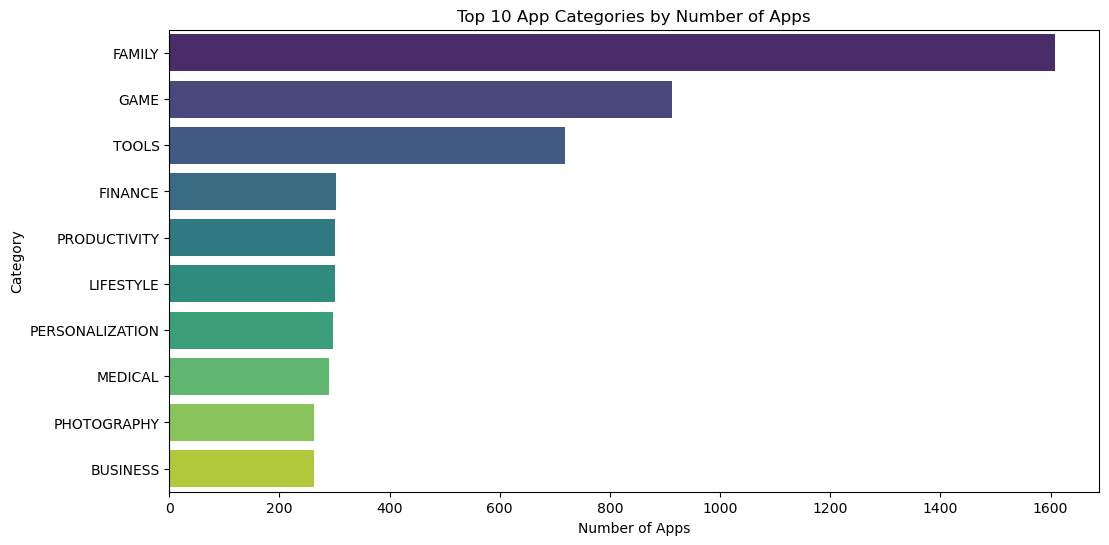

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Example DataFrame: top_categories (Category, app_count)
# If you don't have it yet, run this query first:
# query = "SELECT Category, COUNT(*) AS app_count FROM apps GROUP BY Category ORDER BY app_count DESC LIMIT 10;"
# top_categories = pd.read_sql_query(query, conn)
plt.figure(figsize=(12,6))
sns.barplot(x='app_count', y='Category', data=top_categories, palette='viridis')
plt.title('Top 10 App Categories by Number of Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

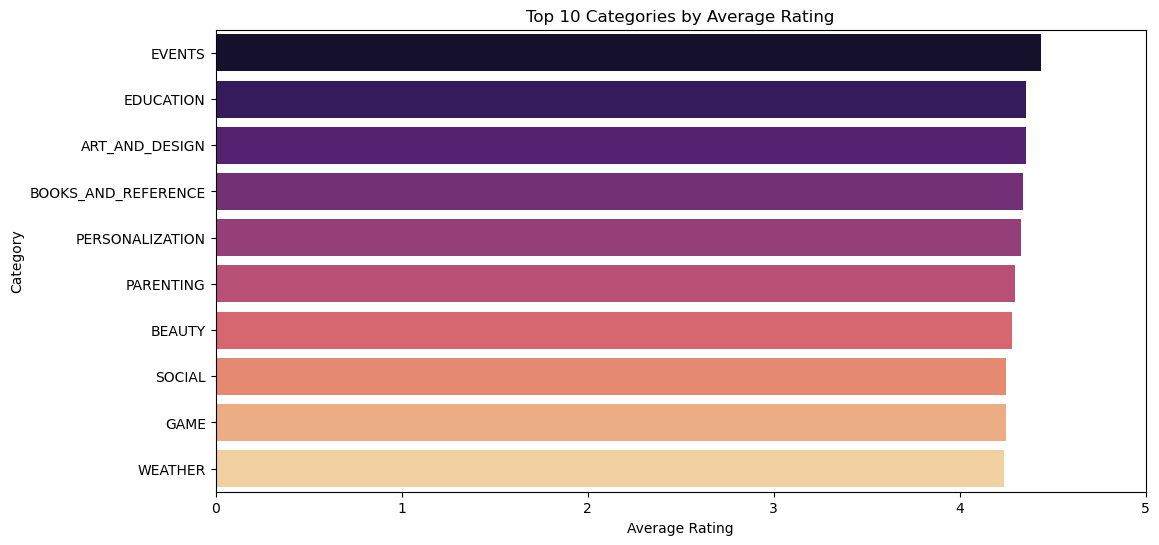

In [25]:
# Assuming df_avg_rating DataFrame from previous SQL query

plt.figure(figsize=(12,6))
sns.barplot(x='avg_rating', y='Category', data=df_avg_rating.head(10), palette='magma')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.xlim(0, 5)  # Ratings are between 0 and 5
plt.show()


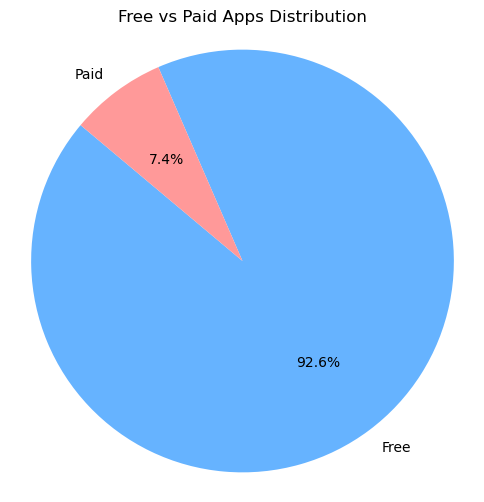

In [26]:
# Assuming df_type_count DataFrame from previous SQL query

plt.figure(figsize=(6,6))
colors = ['#66b3ff', '#ff9999']
plt.pie(df_type_count['count'], labels=df_type_count['Type'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Free vs Paid Apps Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()



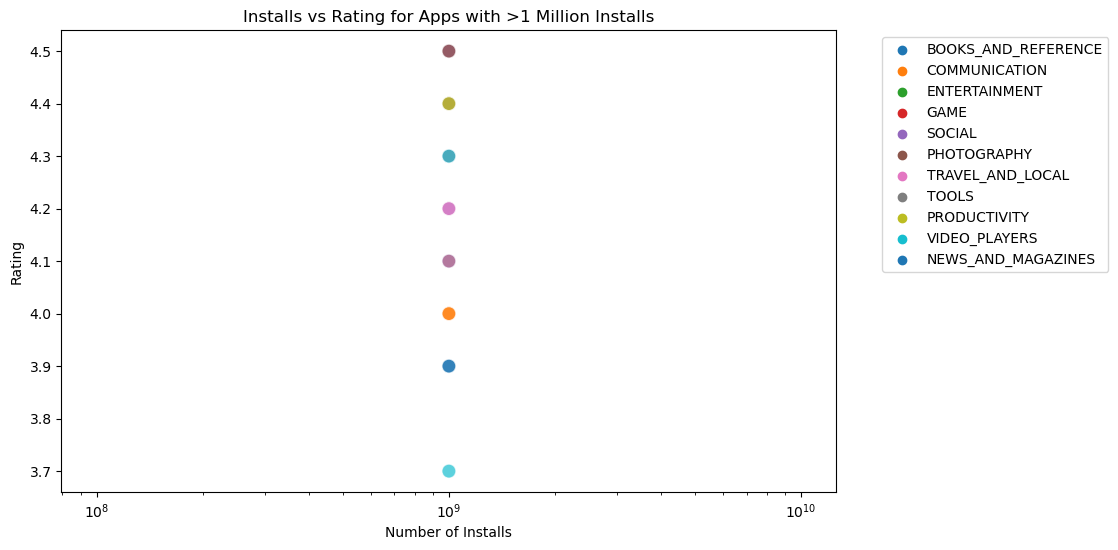

In [27]:
# Assuming df_top_installs DataFrame from previous SQL query

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_top_installs, x='Installs', y='Rating', hue='Category', palette='tab10', s=100, alpha=0.7)
plt.title('Installs vs Rating for Apps with >1 Million Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.xscale('log')  # Log scale for better spread
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


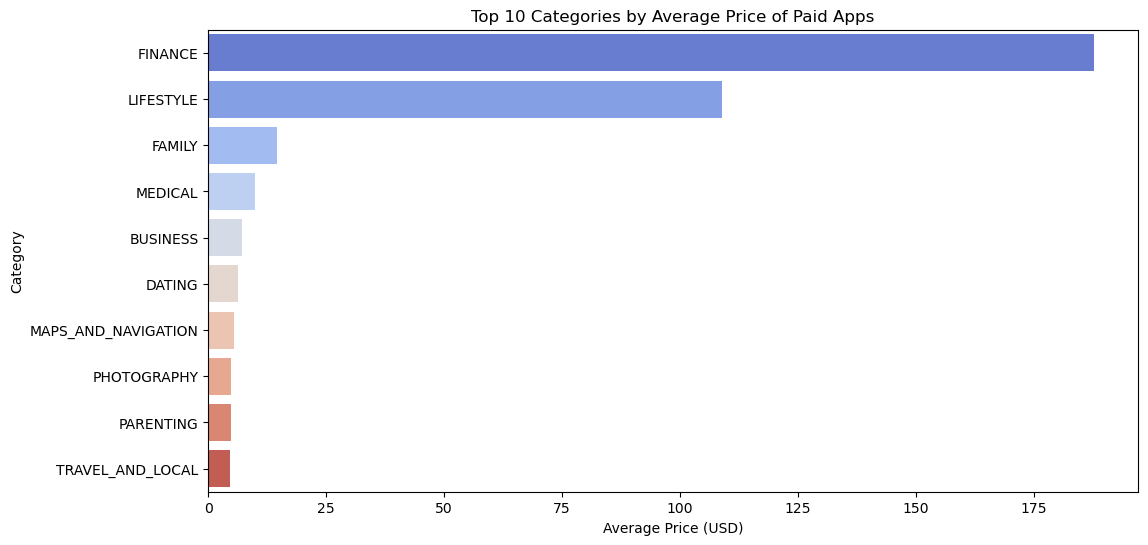

In [28]:
# Assuming df_avg_price DataFrame from previous SQL query

plt.figure(figsize=(12,6))
sns.barplot(x='avg_price', y='Category', data=df_avg_price.head(10), palette='coolwarm')
plt.title('Top 10 Categories by Average Price of Paid Apps')
plt.xlabel('Average Price (USD)')
plt.ylabel('Category')
plt.show()